<a href="https://colab.research.google.com/github/Dreamlander-333/Image-Classification-Minor-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#This is Image-Classification for boats, planes and trains
#This is the model, where the confusion-matrix, accuracy-score, classification-report and the best parameters have been included
#The best paramters for SVC have been used in the model. 

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from skimage.transform import resize
from skimage.io import imread
import pickle

target=[]
images=[]
flat_data=[]

DATADIR = '/content/drive/MyDrive/Images'
CATEGORIES = ['Boats', 'Planes','Trains']

for i in CATEGORIES:
    class_target=CATEGORIES.index(i)
    path=os.path.join(DATADIR,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resize=resize(img_array,(150,150,3))
        flat_data.append(img_resize.flatten())
        images.append(img_resize)
        target.append(class_target)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=100)

model=SVC(C=10,kernel='rbf',gamma=0.0001) #The best parameters from the output of best_params_ have been used here
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

parameters=[
            {'C':[1,10,100],'kernel':['linear']},
            {'C':[1,10,100],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc= SVC(probability=True)

cv = GridSearchCV(svc, parameters)
cv.fit(x_train,y_train)
print(cv.best_params_)

pickle.dump(cv,open('img_model.p','wb'))

[[4 0 1]
 [1 6 0]
 [1 0 5]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       1.00      0.86      0.92         7
           2       0.83      0.83      0.83         6

    accuracy                           0.83        18
   macro avg       0.83      0.83      0.83        18
weighted avg       0.85      0.83      0.84        18

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


Enter your URLhttps://image.cnbcfm.com/api/v1/image/105972972-1560808129044preview-1.jpg?v=1560808139
(2458, 3372, 3)
PREDICTED OUTPUT: Planes


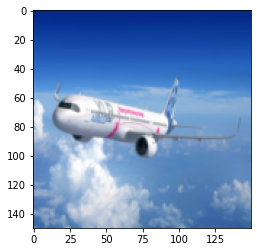

In [34]:
#You can check the model for an image from the google
 
model=pickle.load(open('img_model.p','rb'))
flat_data=[]
url=input('Enter your URL')
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')